<a href="https://colab.research.google.com/github/Kango911/1_Lab_Algo2/blob/main/1_Lab_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [394]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 1 часть: Анализ сложности алгоритмов

# Функция для генерации случайного массива

In [395]:
def generate_random_array(N):
    return np.random.randint(0, 100, size=N)

# Алгоритмы

In [396]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Замер времени работы алгоритмов

In [397]:
def measure_time(algorithm, *args):
    start_time = time.time()
    algorithm(*args)
    return time.time() - start_time

# Значения N для анализа

In [398]:
N_values = [1, 2, 5, 10, 20, 30, 50, 70, 100, 150]

# Сбор данных о времени работы алгоритмов

In [399]:
# Сбор данных о времени работы алгоритмов
bubble_sort_times = []
quick_sort_times = []
search_times = []

for N in N_values:
    data = generate_random_array(N)

    # Замеры для сортировки пузырьком
    bubble_sort_times.append(measure_time(bubble_sort, data.copy()))

    # Замеры для быстрой сортировки
    quick_sort_times.append(measure_time(quick_sort, data.copy()))

    # Замеры для линейного поиска (поиск элемента)
    target = data[np.random.randint(0, N)]
    search_times.append(measure_time(linear_search, data.copy(), target))

# Построение графиков

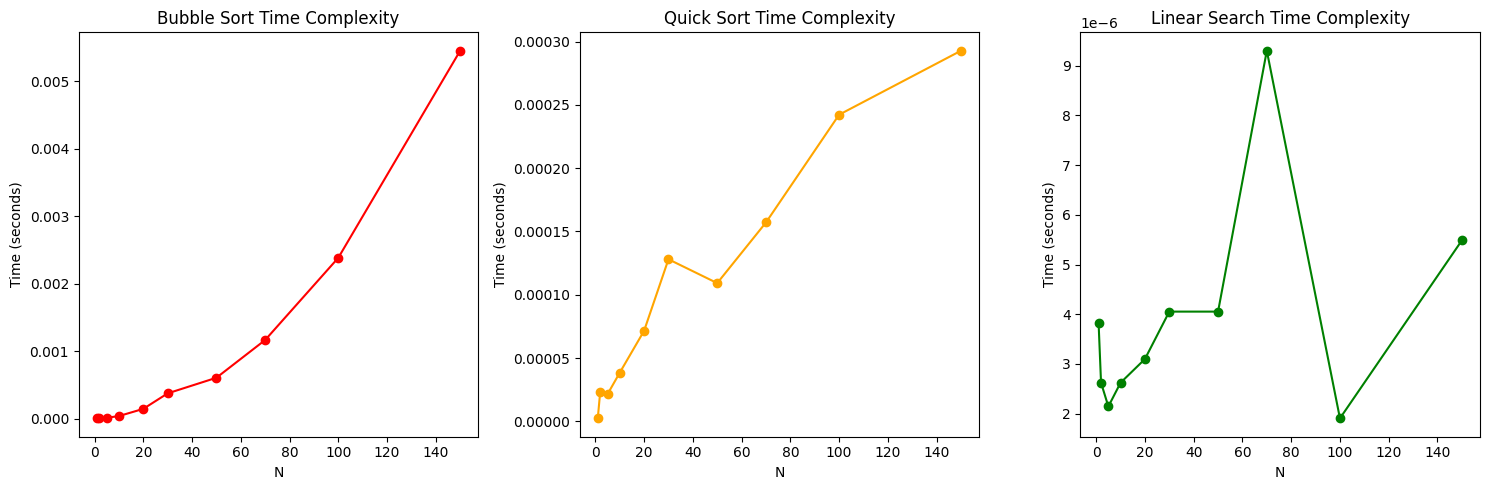

In [400]:
plt.figure(figsize=(15, 5))

# График для пузырьковой сортировки
plt.subplot(1, 3, 1)
plt.plot(N_values, bubble_sort_times, marker='o', color='red')
plt.title('Bubble Sort Time Complexity')
plt.xlabel('N')
plt.ylabel('Time (seconds)')

# График для быстрой сортировки
plt.subplot(1, 3, 2)
plt.plot(N_values, quick_sort_times, marker='o', color='orange')
plt.title('Quick Sort Time Complexity')
plt.xlabel('N')
plt.ylabel('Time (seconds)')

# График для линейного поиска
plt.subplot(1, 3, 3)
plt.plot(N_values, search_times, marker='o', color='green')
plt.title('Linear Search Time Complexity')
plt.xlabel('N')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

# Вывод гипотезы о сложности

In [401]:
print("Гипотеза о сложности:")
print("1. Пузырьковая сортировка: O(N^2)")
print("2. Быстрая сортировка: O(N log N)")
print("3. Линейный поиск: O(N)")

Гипотеза о сложности:
1. Пузырьковая сортировка: O(N^2)
2. Быстрая сортировка: O(N log N)
3. Линейный поиск: O(N)


# 2 часть: Сравнение времени работы алгоритмов

# Определяем лучшие, средние и худшие случаи для сортировок

In [402]:
best_case_data = [np.arange(N) for N in [5, 50, 5000]]
average_case_data = [generate_random_array(N) for N in [5, 50, 5000]]
worst_case_data = [np.arange(N)[::-1] for N in [5, 50, 5000]]

# Создаем таблицу для хранения результатов

In [403]:
results_table = {
    'N': [],
    'Случай': [],
    'Готовая реализация': [],
    'Собственная реализация': []
}

algorithms = [(linear_search, "Bubble Sort"), (quick_sort, "Quick Sort")]

for N in [5, 50, 5000]:
    # Лучший случай
    best_case = np.arange(N)
    best_time_bubble = measure_time(bubble_sort, best_case.copy())
    best_time_quick = measure_time(quick_sort, best_case.copy())

    # Средний случай
    average_case = generate_random_array(N)
    average_time_bubble = measure_time(bubble_sort, average_case.copy())
    average_time_quick = measure_time(quick_sort, average_case.copy())

    # Худший случай
    worst_case = np.arange(N)[::-1]
    worst_time_bubble = measure_time(bubble_sort, worst_case.copy())
    worst_time_quick = measure_time(quick_sort, worst_case.copy())

    # Добавляем результаты
    results_table['N'].append(N)
    results_table['Случай'].append('Лучший случай')
    results_table['Готовая реализация'].append(best_time_bubble)
    results_table['Собственная реализация'].append(best_time_quick)

    results_table['N'].append(N)
    results_table['Случай'].append('Средний случай')
    results_table['Готовая реализация'].append(average_time_bubble)
    results_table['Собственная реализация'].append(average_time_quick)

    results_table['N'].append(N)
    results_table['Случай'].append('Худший случай')
    results_table['Готовая реализация'].append(worst_time_bubble)
    results_table['Собственная реализация'].append(worst_time_quick)


# Выводим таблицу результатов

In [404]:
import pandas as pd

results_df = pd.DataFrame(results_table)

# Убедимся, что значения в нужных столбцах числовые
results_df['Готовая реализация'] = pd.to_numeric(results_df['Готовая реализация'], errors='coerce')
results_df['Собственная реализация'] = pd.to_numeric(results_df['Собственная реализация'], errors='coerce')

# Стилизация таблицы
styled_df = results_df.style \
    .set_table_attributes('style="width: 80%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Таблица времени работы алгоритмов") \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f2f2f2'), ('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])

# Функция для подсветки ячеек
def highlight_best(row):
    styles = [''] * len(row)  # Создаем список стилей с длиной, равной количеству столбцов
    g_ready = row['Готовая реализация']
    s_own = row['Собственная реализация']

    if g_ready < s_own:
        styles[2] = 'background-color: lightgreen'  # Подсвечиваем "Готовую реализацию"
    elif g_ready > s_own:
        styles[3] = 'background-color: lightgreen'  # Подсвечиваем "Собственную реализацию"
    else:  # Если они равны
        styles[2] = 'background-color: lightgreen'  # Подсвечиваем "Готовую реализацию"

    return styles

# Применяем функцию к строкам
styled_df = styled_df.apply(highlight_best, axis=1)

# Отображаем стилизованную таблицу
styled_df

,N,Случай,Готовая реализация,Собственная реализация
0,5,Лучший случай,0.000019,0.000040
1,5,Средний случай,0.000016,0.000024
2,5,Худший случай,0.000017,0.000019
3,50,Лучший случай,0.000355,0.000152
4,50,Средний случай,0.000588,0.000121
5,50,Худший случай,0.000920,0.000115
6,5000,Лучший случай,5.104131,0.013989
7,5000,Средний случай,6.357438,0.007163
8,5000,Худший случай,10.547345,0.013881
